# GRIP : The Sparks Foundation 
## Data Science & Business Analytics Internship

### Task - 2 Prediction using unsupervised ML 
#### Problem statement : From the given "Iris" dataset,predict the optimum number of clusters and rerpresent it visually.

## Author : Ravina Ramesh Durge

### Batch - January 2022

In [14]:
# First we will Import all Libraries required in this notebook

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
# Reading data from remote link
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### K-Means clustering 

#### Let us perform the centroid-based clustering algorithm calles K-Means clustering. Such algorithms are efficient but sensitive to initial conditions and outliers.

#### Here we consider two techniques- the Elbow method and the silhouette score method to decide on the optimum number of clusters(k) to perform the K-Means clustering.


### Optimal value of k using Elbow plot

In [16]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values #data arrangement

from sklearn.cluster import KMeans

#create several cluster combinations and observe the wcss(Within Cluster Sum of Squares)
wcss = [] #empty list to store the wcss
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters = i,init = 'k-means++',
                  max_iter = 300,n_init = 10,random_state=0)
    kmeans = kmeans.fit(x)  #fit the model on prepared data
    wcss.append(kmeans.inertia_) #returns wcss for specific value of k
wcss    

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

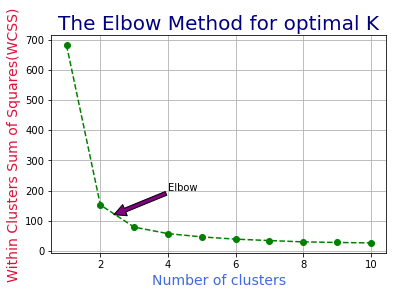

In [19]:
#visualize the elbow plot to find the optimal value of k
plt.plot(K,wcss,"go--")

#setting the plot title and axis labels
plt.title("The Elbow Method for optimal K",size=20,color='navy')
plt.xlabel("Number of clusters",size=14,color='royalblue')
plt.ylabel("Within Clusters Sum of Squares(WCSS)",size=14,color='crimson')
plt.annotate("Elbow",xytext=(4,200),xy=(2.4,120),arrowprops={"facecolor":"purple"})
plt.grid()
plt.show()#display the plot

#### Elbow plot is plotted with the value of k on the x-axis and the WCSS(Within Clusters Sum of Squares) on the y-axis. The value of k corresponding to the Elbow point represents the optimal value for k.

#### In the above plot, the Elbow point is representated by the arrow and the elbow occurs by 3 points.

#### Hence, the Elbow method shows that optimum value for k is 3. 

### Visualising the Clusters with centroids 

In [6]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

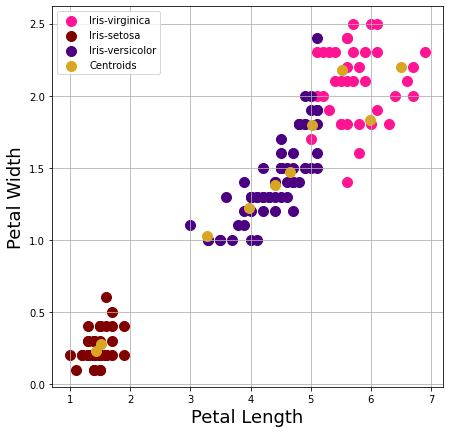

In [40]:
#Visualising the clusters
fig = plt.figure(figsize= (7, 7))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'deeppink', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'maroon', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'indigo', label = 'Iris-versicolor')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'goldenrod', label = 'Centroids')
plt.xlabel('Petal Length',size=18)
plt.ylabel('Petal Width',size=18)
plt.grid();
plt.legend();

Thus, we have predicted the optimum number of clusters and represented it visually. 

                                         Thank You!